### Sigmoid

Sigmoid or logistic function models the probability that sample x belongs to the positive class in a binary classification task.


Given $z = w_0x_0 + w_1x_1 + \cdots + w_mx_m = \sum_{i=0}^m w_ix_i = w^Tx $ 

$\phi_\text{logistic} (z) = \frac{1}{1 + e^{-z}}$

In [6]:
import numpy as np

X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w)) 

P(y=1|x) = 0.888


88.8% probability that this particular sample x belongs to the positive class.

### Multiclass sigmoid does not work
Multiple logistic activation untis does not produce meaningful, interpretable probability values:


In [7]:
# W : array with shape = (n_output_units, n_hidden_units+1)
# note that the first column are the bias units

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : data array with shape = (n_hidden_units + 1, n_samples)
# note that the first column of this array must be 1

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)

print('Output Units:\n', y_probas) 

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.85569687 0.68135373 0.83889105]


the outputs do not add up to 1.

### Softmax to the rescue

Probability of a particular sample with net input $z$ belonging to the ith class is: 

$P(y=i|z) = \phi(\vec{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$

*softmax* offers a normalized output to obtain meaningful class-membership predictions in multiclass settings.


In [8]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

np.sum(y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


1.0

### Broadening the output spectrum using a hyperbolic tangent

Hyperbolic tangent (**tanh**) is a rescaled version of the logistic function: 

$\phi_\text{tanh} (z) = 2 \times \phi_\text{logistic} (2z) - 1 = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$

with the advantage of **broader output spectrum** in the interval (-1, 1), which can improve the convergence of the backpropagation algorithm.

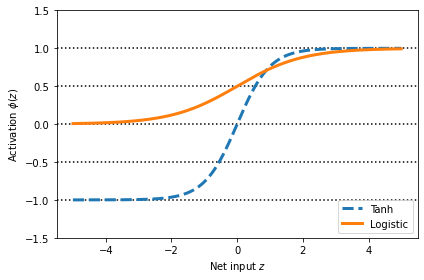

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### Rectified linear unit activation (ReLU)

ReLU comes to the rescue to address the vanishing gradient problem of tanh and logistic activations. The derivative of activations with respect to the net input diminishes as z becomes large. This results in a very slow learning of the weights during the training phase since the gradient terms may be very close to zero.


$\phi_\text{ReLU} = max \left(0, z \right)$

ReLU is still a non-linear function that is good for learning complex functions. It has the added benefit that its derivative is always 1 for positive input values => solves the problem of vanishing gradidents.